In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

In [12]:

def generateODE(t, y):
    # Unpack the variables from the y vector
    m0, m1, m2, m3, m4, C = y
   
    T = 315 - (20)*((t/300)**(1/3))
   
    # Calculate other necessary quantities based on y and T
    
    C_sat =  (1.5848 * (10 ** -5) * (T ** 2)) - ((9.0567) * (10 ** (-3)) * (T)) + 1.3066
    delta_C = max(C - C_sat,0)
   
    B = (1.2957941674247117e+21) * ((delta_C) ** (7))
    
    G = (0.0166/60) * ((delta_C) ** (1.5))
   
    # Define your differential equations using y, C, T, and other quantities
    dm0 = B
    dm1 = ((G) * (m0)) + (B*(10**(-6)))
    dm2 = (2) * (G) * (m1) + (B*(10**(-12)))
    dm3 = (3) * (G) * (m2) +  (B*(10**(-18)))
    dm4 = (4) * (G) * (m3) + (B*(10**(-24)))
    dC = (-3) * (1296) * (0.24) * (G) * (m2) - (1296 * 0.24 * B *(10**(-18)))
   
    return [dm0, dm1, dm2, dm3, dm4, dC]

# Initial conditions
initialConditions = [0, 0, 0, 0, 0, 0.0256]



# Parameters
# Define your parameters here

t_span = (0, 300)
num_points = 300

sol = solve_ivp(
    lambda t, y: generateODE(t, y),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'zeroth moment')

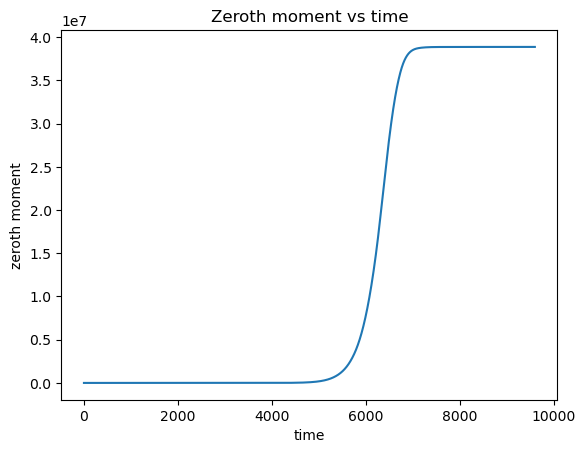

In [4]:
plt.plot(sol.t,sol.y[0])
plt.title("Zeroth moment vs time")
plt.xlabel("time")
plt.ylabel("zeroth moment")

Text(0, 0.5, '1st moment')

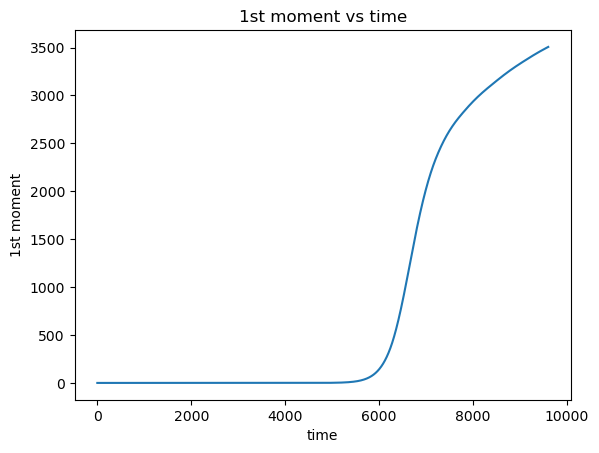

In [4]:
plt.plot(sol.t,sol.y[1])
plt.title("1st moment vs time")
plt.xlabel("time")
plt.ylabel("1st moment")

Text(0, 0.5, '2nd moment')

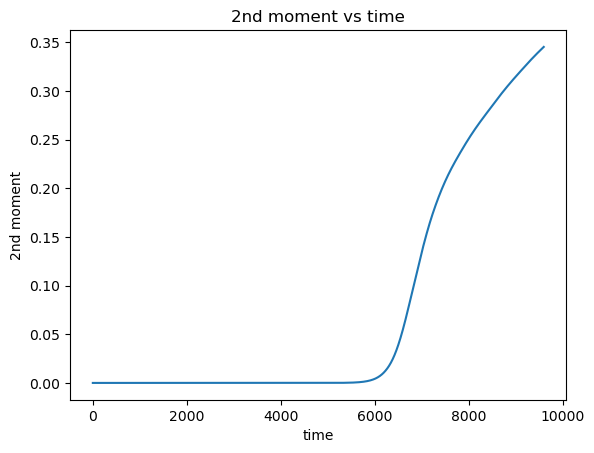

In [5]:
plt.plot(sol.t,sol.y[2])
plt.title("2nd moment vs time")
plt.xlabel("time")
plt.ylabel("2nd moment")

Text(0, 0.5, '3rd moment')

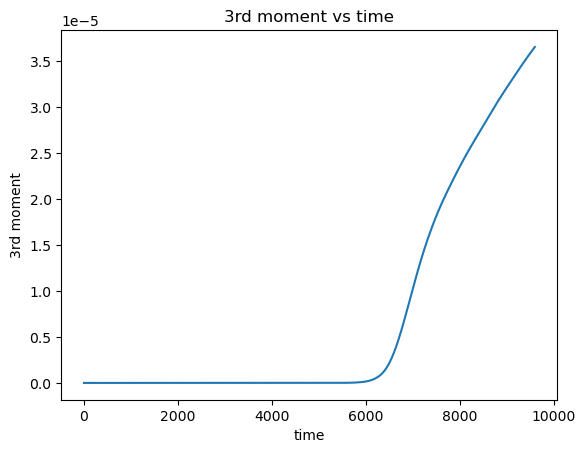

In [6]:
plt.plot(sol.t,sol.y[3])
plt.title("3rd moment vs time")
plt.xlabel("time")
plt.ylabel("3rd moment")

Text(0, 0.5, '4th moment')

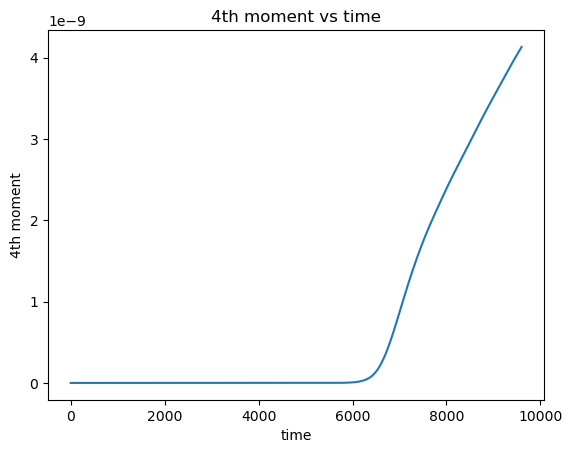

In [7]:
plt.plot(sol.t,sol.y[4])
plt.title("4th moment vs time")
plt.xlabel("time")
plt.ylabel("4th moment")

Text(0, 0.5, 'concentration')

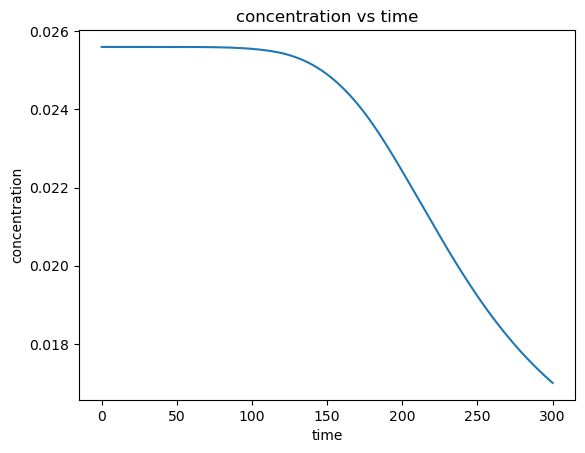

In [13]:
plt.plot(sol.t,sol.y[5])
plt.title("concentration vs time")
plt.xlabel("time")
plt.ylabel("concentration")